In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata
%matplotlib inline

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


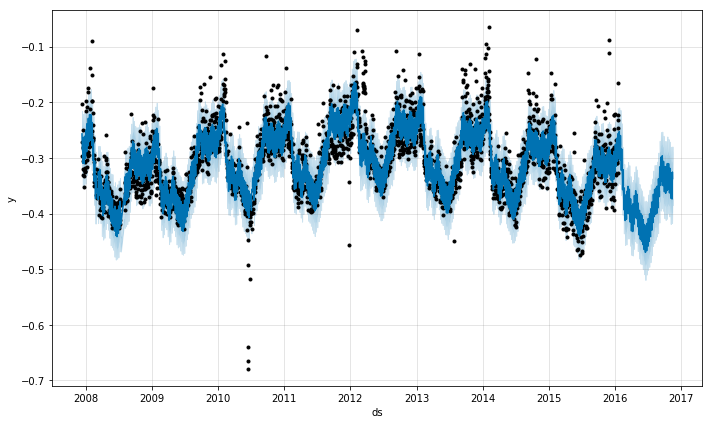

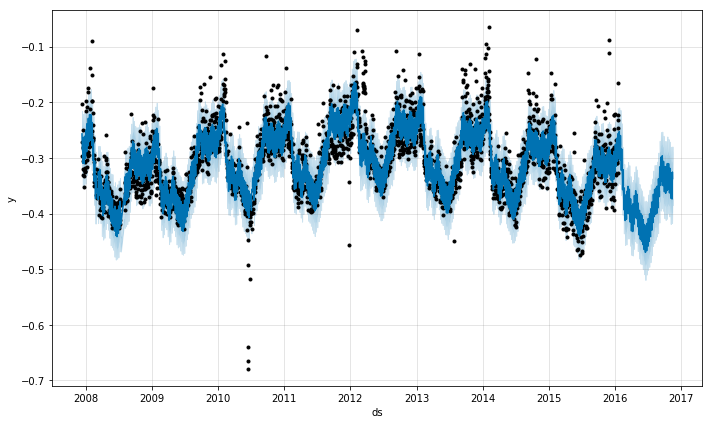

In [14]:
df = pdata.peyton_manning()
df['y'] = np.log(df['y'])
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=300)
fcst = m.predict(future)
m.plot(fcst)

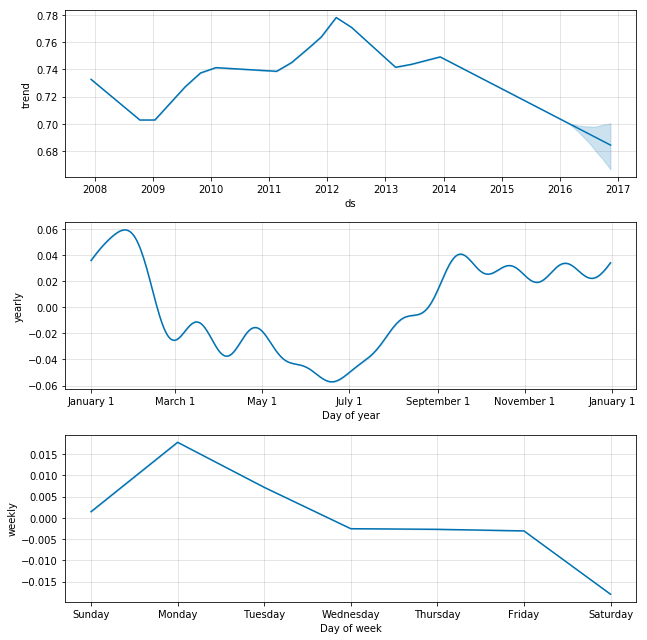

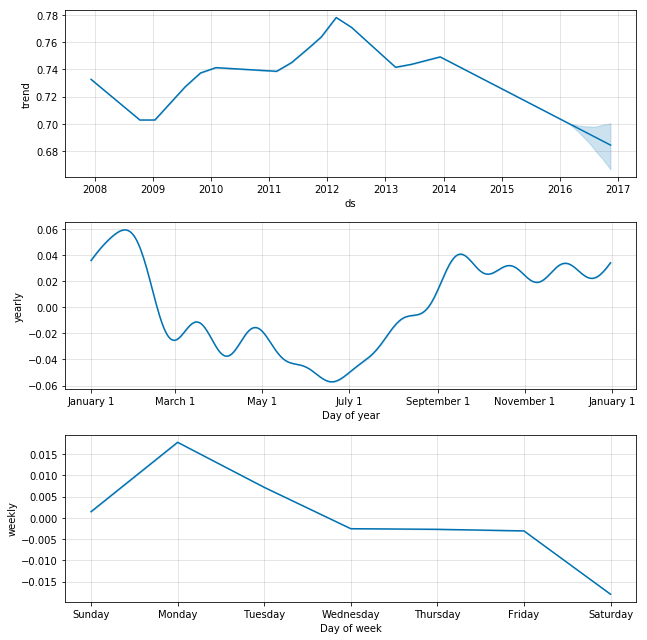

In [6]:
m.plot_components(fcst)

In [7]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '730 days')
df_cv.head()

/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-21,0.807887,0.775516,0.840825,0.856720,2014-01-20
1,2014-01-22,0.798744,0.764847,0.830360,0.834218,2014-01-20
2,2014-01-23,0.798559,0.765478,0.830320,0.822201,2014-01-20
3,2014-01-24,0.798770,0.768316,0.830618,0.828177,2014-01-20
4,2014-01-25,0.787147,0.750968,0.816010,0.805409,2014-01-20
